In [3]:
import pyPLUTO as pp
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np


In [7]:
# Load data in your output folder
D = pp.Load('all', vars = True, datatype = 'flt', path="/dartfs-hpc/rc/home/7/f007gj7/epaco/libs/gPLUTO/Test_Problems/MHD/Kelvin_Helmholtz/")

Load: folder /dartfs-hpc/rc/home/7/f007gj7/epaco/libs/gPLUTO/Test_Problems/MHD/Kelvin_Helmholtz/,     output [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]


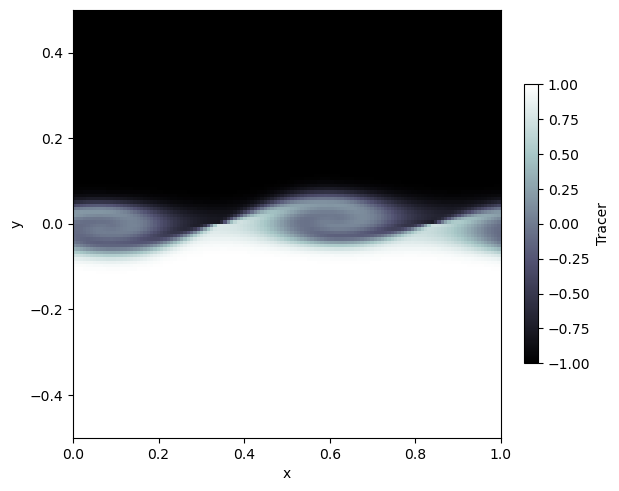

In [5]:
# Select a specific time frame (index 112) of tracer variable tr1
data = D.tr1[112]

# Create a figure and axis with a tall aspect ratio
fig, ax = plt.subplots(figsize=(6, 8.5))

# Plot 2D data using a colored mesh
pcm = ax.pcolormesh(
    D.x1, D.x2, data.T,   # Grid coordinates in x and y; transpose data to match axis orientation
    shading='auto',       # Automatically choose flat or nearest shading to avoid warnings
    cmap='bone'           # Grayscale-style colormap
)

# Label axes and control plot geometry
ax.set_xlabel('x')        # Horizontal spatial coordinate
ax.set_ylabel('y')        # Vertical spatial coordinate
ax.set_aspect('equal')    # Ensure equal scaling in x and y (no distortion)
ax.set_ylim([-0.5, 0.5])  # Restrict visible y-range to zoom into region of interest

# Add a colorbar with fine control over its size and spacing
cbar = fig.colorbar(
    pcm, ax=ax,
    label='Tracer',       # Colorbar label
    fraction=0.03,        # Relative width of the colorbar compared to the plot
    pad=0.05              # Gap between plot and colorbar
)

# Render the figure
plt.show()


100%|██████████| 89/89 [00:00<00:00, 360.36it/s]


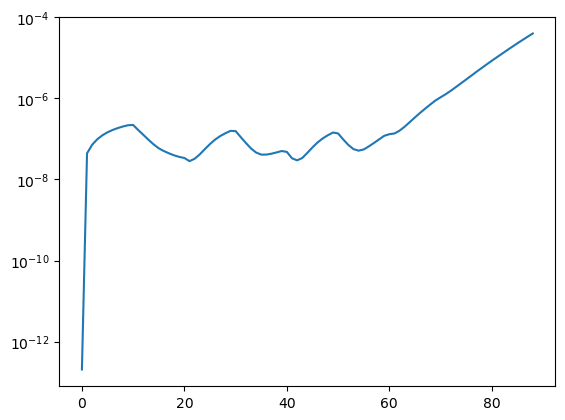

In [8]:
# Initialize list to store volume-integrated transverse velocity energy vs time
vperp = []

# Loop over simulation output steps (0 through 200)
for step in tqdm(range(0, 89)):
    data = D.vx2[step]**2  # Square of transverse velocity component (v_y^2)

    # Integrate over the full simulation volume:
    # sum over all grid cells × cell volume (dx * dy * dz)
    vperp.append(np.sum(data) * D.dx1[0] * D.dx2[0] * D.dx3[0])

# Convert to NumPy array for easier analysis and plotting
vperp = np.array(vperp)

# Plot time evolution of the integrated perpendicular kinetic energy proxy
plt.plot(vperp)

# Use logarithmic scale to better show growth/decay over orders of magnitude
plt.yscale('log')
